In [1]:
"""
This notebook aims to present an illustrative example of a methodology to visualize research data, which can aid in comprehending complex information. 
The research data was imported from the Edmond research data repository from the publication
"Majorities for Minorities: Participatory Constitution Making and the Protection of Minority Rights" (Hudson & Alexander, 2020). 
As an example, key variables of the paper such as the minority rights index and population participation for different countries were presented on a map for easier understanding.
In addition, graphs were created to illustrate the hypotheses proposed in the paper.
"""

'\nThis notebook aims to present an illustrative example of a methodology to visualize research data, which can aid in comprehending complex information. \nThe research data was imported from the Edmond research data repository from the publication\n"Majorities for Minorities: Participatory Constitution Making and the Protection of Minority Rights" (Hudson & Alexander, 2020). \nAs an example, key variables such as the minority rights index and population participation for different countries were presented on a map for easier understanding.\nIn addition, graphs were created to illustrate the hypotheses proposed in the paper.\n'

In [4]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Import file from edmond
import requests
import zipfile
import io

# Get all files of the dataset as zipfile
x = requests.get("https://edmond.mpdl.mpg.de/api/access/dataset/:persistentId?persistentId=doi:10.17617/3.0XWBTA")

# Open the zip file, iterate trough every file
with zipfile.ZipFile(io.BytesIO(x.content)) as zip_file:
    for zip_info in zip_file.infolist():
        # Search for specific file in zipfile
        if zip_info.filename =='maj_min_data.csv':
            # Extract the CSV file to the current working directory
            zip_file.extract(zip_info.filename)
            print(f'Saved CSV file: {zip_info.filename}')

print('Zip file downloaded and saved to disk.')

Saved CSV file: maj_min_data.csv
Zip file downloaded and saved to disk.


In [6]:
# Import required libraries
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
import pandas as pd

# Define a function that takes a country name as input and returns a tuple containing the country's alpha-2 code and its continent code
def get_continent(col):
    try:
        # Use pycountry_convert to get the alpha-2 code for the country name
        cn_a2_code =  country_name_to_country_alpha2(col) 
    except:
        # If the country name is not found, set the alpha-2 code to 'NA'
        cn_a2_code = 'NA' 
    try:
        # Use pycountry_convert to get the continent code for the alpha-2 code
        cn_continent = country_alpha2_to_continent_code(cn_a2_code) 
    except:
        # If the alpha-2 code is not found, set the continent code to 'NA'
        cn_continent = 'NA' 
         # Return the alpha-2 code and continent code as a tuple
    return (cn_a2_code, cn_continent)

# Load data from CSV file into a pandas dataframe
df = pd.read_csv('maj_min_data.csv')

# Reset the index of the dataframe
df = df.reset_index()

# Create an empty list to store the alpha-2 code and continent code for each row
list = []

# Iterate over each row in the dataframe using iterrows()
for index, row in df.iterrows():
    # Call the get_continent function with the value in the 'COUNTRY' column as input
    df_with_A2_code = get_continent(row['COUNTRY'])
    # Append the resulting tuple to the list
    list.append(df_with_A2_code)

# Create a new dataframe from the list with columns 'Country' and 'Continent'
new_df = pd.DataFrame(list, columns=['Country', 'Continent'])

# Concatenate the original dataframe and the new dataframe horizontally using concat()
df = pd.concat([df, new_df], axis=1)

# Display the first 10 rows of the resulting dataframe using head()
df.head(10)

,index,Unnamed: 0,cowcode,YEAR,COUNTRY,CCODE,Polityafter,Polityafter456,Polityafter8910,Polityafter5,...,GDP,ODA.y,ODA_GDP,ODA_GDP_mean,gov_exp,arable_land,Int,intensity_mean_3,Country,Continent
0,0,1,40,1976,Cuba,CUB,-7.0,-7.00,-7.00,-7.0,...,1.378958e+10,4.566000e+07,0.003311,0.002107,31.666505,28.184358,0.0,0.0,CU,NA
1,1,2,41,1987,Haiti,HTI,-2.0,-7.00,7.00,-4.0,...,2.047200e+09,2.104800e+08,0.102814,0.082532,NaN,28.301887,0.0,0.0,HT,NA
2,2,3,42,2002,Dominican Republic,DOM,8.0,8.00,8.00,8.0,...,2.736288e+10,1.610200e+08,0.005885,0.004395,9.971615,18.588284,0.0,0.0,DO,NA
3,3,4,42,2010,Dominican Republic,DOM,NaN,NaN,NaN,NaN,...,5.386018e+10,1.938100e+08,0.003598,0.003400,9.927111,16.559718,0.0,0.0,DO,NA
4,4,5,52,1976,Trinidad & Tobago,TTO,8.0,8.00,9.00,8.0,...,2.500411e+09,3.810000e+06,0.001524,0.001642,NaN,12.670565,0.0,0.0,NA,AF
5,5,6,90,1985,Guatemala,GTM,3.0,3.00,3.00,3.0,...,9.721652e+09,7.602000e+07,0.007820,0.006430,6.953551,12.131392,1.0,1.0,GT,NA
6,6,7,91,1982,Honduras,HND,5.6,5.00,6.00,5.4,...,4.266504e+09,1.221900e+08,0.028639,0.024175,NaN,13.191527,0.0,0.0,HN,NA
7,7,8,92,1983,El Salvador,SLV,6.0,6.00,7.00,6.0,...,3.506348e+09,2.501100e+08,0.071331,0.053683,15.829448,22.683398,2.0,2.0,SV,NA
8,8,9,93,1974,Nicaragua,NIC,-8.0,-2.67,-3.67,-6.4,...,1.520900e+09,3.037000e+07,0.019968,0.019784,7.716295,8.808376,0.0,0.0,NI,NA
9,9,10,93,1987,Nicaragua,NIC,-1.3,6.00,8.00,3.2,...,3.851214e+09,1.450000e+08,0.037650,0.041625,34.233067,10.387236,2.0,2.0,NI,NA


In [7]:
# Import required libraries
from geopy.geocoders import Nominatim
import csv

# Initialize the Nominatim geolocator with a custom user agent
geolocator = Nominatim(user_agent='myapplication')

# Define a function that takes a country name as input and returns a tuple containing the latitude and longitude of the center of the country
def geolocate(country):
    try:
        # Use the geolocator to find the center of the country
        loc = geolocator.geocode(country)
        # Return the latitude and longitude of the center
        return (loc.latitude, loc.longitude)
    except:
        # If an error occurs (e.g. the country name is not found), return (0, 0)
        return (0, 0)

# Create an empty list to store the latitude and longitude for each row
list2 = []

# Iterate over each row in the dataframe using iterrows()
for index, row in df.iterrows():
    # Call the geolocate function with the value in the 'COUNTRY' column as input
    df_with_A2_code = geolocate(row['COUNTRY'])
    # Print the resulting tuple
    print(df_with_A2_code)
    # Append the resulting tuple to the list
    list2.append(df_with_A2_code)
    
# Create a new dataframe from the list with columns 'latitude' and 'longitude'
new_df2 = pd.DataFrame(list2, columns=['latitude', 'longitude'])

# Concatenate the original dataframe and the new dataframe horizontally using concat()
df = pd.concat([df, new_df2], axis=1)    

# Display the first 10 rows of the resulting dataframe
df.head(10)

# Save it as CSV file
df.to_csv("maj_min_long_and_lat.csv")

(23.0131338, -80.8328748)
(19.1399952, -72.3570972)
(19.0974031, -70.3028026)
(19.0974031, -70.3028026)
(10.7466905, -61.0840075)
(15.5855545, -90.345759)
(15.2572432, -86.0755145)
(13.8000382, -88.9140683)
(12.6090157, -85.2936911)
(12.6090157, -85.2936911)
(4.099917, -72.9088133)
(8.0018709, -66.1109318)
(4.8417097, -58.6416891)
(4.1413025, -56.0771187)
(-1.3397668, -79.3666965)
(-1.3397668, -79.3666965)
(-6.8699697, -75.0458515)
(-10.3333333, -53.2)
(-17.0568696, -64.9912286)
(-23.3165935, -58.1693445)
(-31.7613365, -71.3187697)
(50.6402809, 4.6667145)
(46.7985624, 8.2319736)
(39.3260685, -4.8379791)
(42.5407167, 1.5732033)
(39.6621648, -8.1353519)
(52.215933, 19.134422)
(47.1817585, 19.5060937)
(49.7439047, 15.3381061)
(48.7411522, 19.4528646)
(41.000028, 19.9999619)
(44.1534121, 20.55144)
(41.6171214, 21.7168387)
(45.3658443, 15.6575209)
(44.3053476, 17.5961467)
(44.3053476, 17.5961467)
(46.1199444, 14.8153333)
(38.9953683, 21.9877132)
(42.6073975, 25.4856617)
(47.2879608, 28.5670

In [8]:
# Import required libraries
import folium
import pandas as pd
from folium.plugins import MarkerCluster

# Read CSV file into a pandas DataFrame
df = pd.read_csv('maj_min_long_and_lat.csv')

# Create an empty map using CartoDB Positron tiles
world_map = folium.Map(tiles="cartodbpositron")

# Create a marker cluster for the map
marker_cluster = MarkerCluster().add_to(world_map)

# Loop through each coordinate in the DataFrame
for i in range(len(df)):
    # Get the latitude and longitude values
    lat = df.iloc[i]['latitude']
    long = df.iloc[i]['longitude']
    
    # Set the radius for the circle marker
    radius = 5
    
    # Set the text for the popup on the circle marker
    popup_text = """Country : {}<br>
                    Participation of Population : {}<br>
                    Minority Index : {}<br>"""
    popup_text = popup_text.format(df.iloc[i]['COUNTRY'],
                                   df.iloc[i]['Process_aggregate'],
                                   df.iloc[i]['minority_index']
                                   )
    # Create the circle marker and add it to the marker cluster
    folium.CircleMarker(location=[lat, long], radius=radius, popup=popup_text, fill=True).add_to(marker_cluster)

# Display the map
world_map

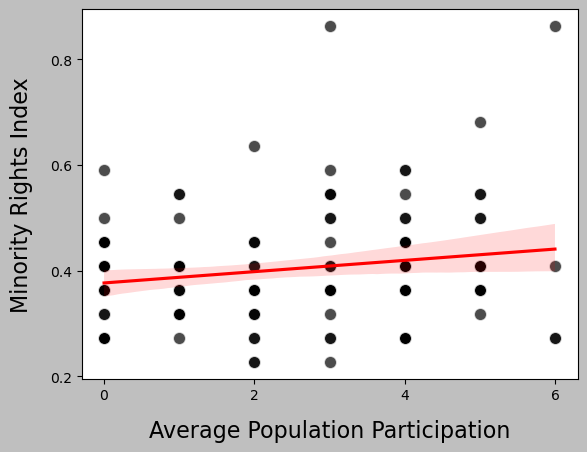

In [9]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style 

# Use grayscale style for the plot
style.use('grayscale')

# Read data from CSV file and drop any rows with missing values in 'Process_aggregate' or 'minority_index' columns
data = pd.read_csv("maj_min_data.csv")
data = data.dropna(subset=['Process_aggregate', 'minority_index'])

# Create a scatter plot with a regression line using Seaborn
sns.regplot(x='Process_aggregate', y='minority_index', data=data, lowess=False, scatter_kws=dict(s=80, alpha=0.7, edgecolors='white'), line_kws={"color": "red"})

# Set the context of the plot to "poster" for larger fonts
sns.set_context("poster")

# Add x and y axis labels with font size and padding
plt.xlabel('Average Population Participation', fontsize=16, labelpad=12)
plt.ylabel('Minority Rights Index', fontsize=16, labelpad=12)

# Show the plot
plt.show()


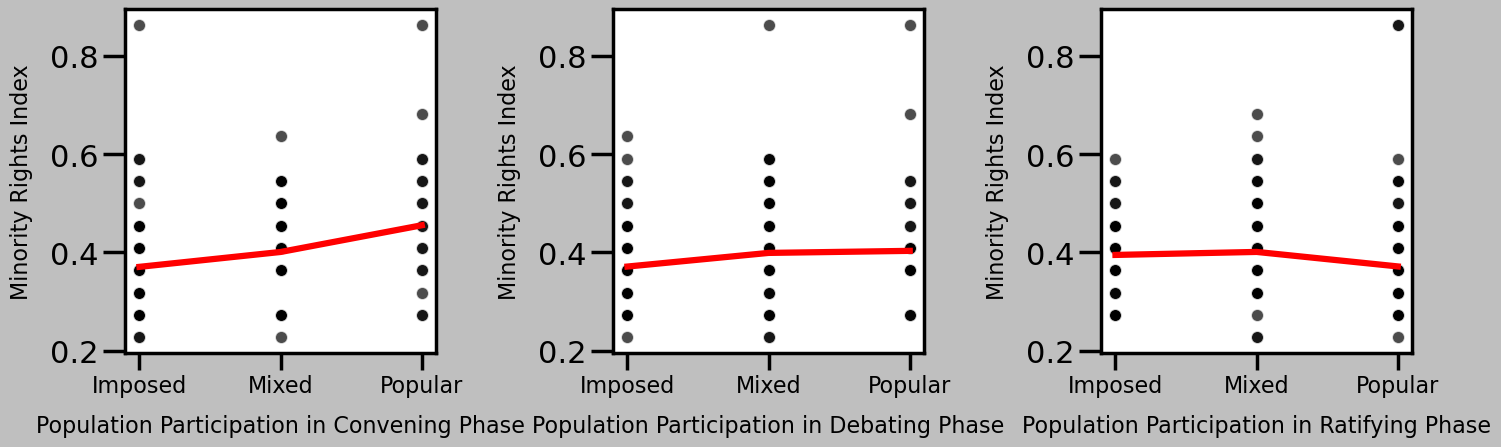

In [10]:
# Import required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read data from CSV file and remove missing values
data = pd.read_csv("maj_min_data.csv")
data = data.dropna(subset=["Prcoss_Convening"])
data = data.dropna(subset=["Process_Debating"])
data = data.dropna(subset=["Process_Ratifying"])
data = data.dropna(subset=["minority_index"])


# Encode categorical data to nominal data points
data['Prcoss_Convening_encoded'] = pd.Categorical(data['Prcoss_Convening']).codes
data['Process_Debating_encoded'] = pd.Categorical(data['Process_Debating']).codes
data['Process_Ratifying_encoded'] = pd.Categorical(data['Process_Ratifying']).codes

# Create a figure with three subplots for each phase of the political process
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))


# Create a regression plot for each phase with encoded data and customize the plot
sns.regplot(x="Prcoss_Convening_encoded", y="minority_index", data=data, lowess=True, scatter_kws=dict(s=80, alpha=0.7, edgecolors='white'), line_kws={"color": "red"}, ax=axes[0])
axes[0].set_xticks([0, 1, 2])
axes[0].set_xticklabels(['Imposed','Mixed','Popular'], fontsize=16)
axes[0].tick_params(axis='y', size=16)
axes[0].set_xlabel('Population Participation in Convening Phase', fontsize=16, labelpad=12)
axes[0].set_ylabel('Minority Rights Index', fontsize=16, labelpad=12)

sns.regplot(x="Process_Debating_encoded", y="minority_index", data=data, lowess=True, scatter_kws=dict(s=80, alpha=0.7, edgecolors='white'), line_kws={"color": "red"}, ax=axes[1])
axes[1].set_xticks([0, 1, 2])
axes[1].set_xticklabels(['Imposed','Mixed','Popular'], fontsize=16)
axes[1].tick_params(axis='y', size=16)
axes[1].set_xlabel('Population Participation in Debating Phase', fontsize=16, labelpad=12)
axes[1].set_ylabel('Minority Rights Index', fontsize=16, labelpad=12)

sns.regplot(x="Process_Ratifying_encoded", y="minority_index", data=data, lowess=True, scatter_kws=dict(s=80, alpha=0.7, edgecolors='white'), line_kws={"color": "red"}, ax=axes[2])
axes[2].set_xticks([0, 1, 2])
axes[2].set_xticklabels(['Imposed','Mixed','Popular'], fontsize=16)
axes[2].tick_params(axis='y', size=16)
axes[2].set_xlabel('Population Participation in Ratifying Phase', fontsize=16, labelpad=12)
axes[2].set_ylabel('Minority Rights Index', fontsize=16, labelpad=12)

#Adjust the layout and display the plot
fig.tight_layout()
plt.show()


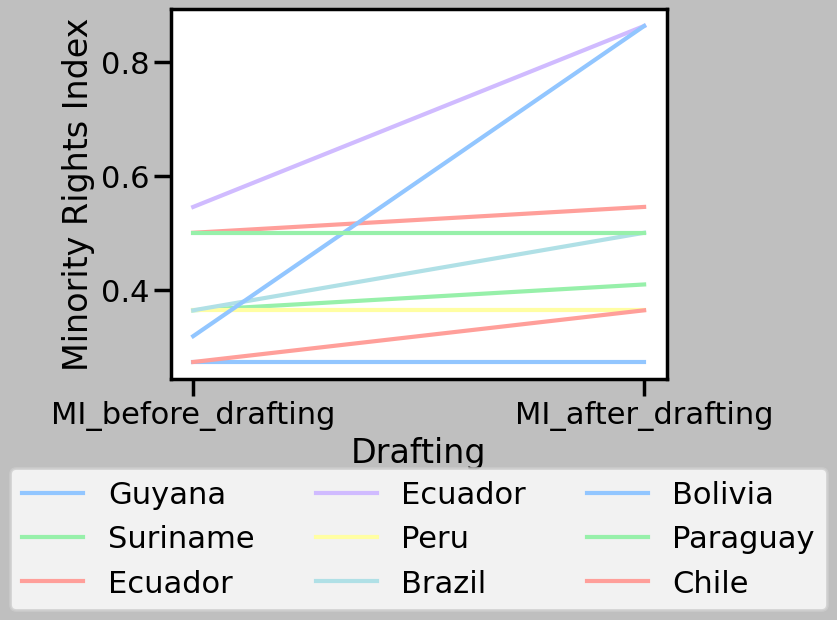

In [11]:
# Show the changes in minority rights index before and after constitution drafting for 8 random examples

import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV file
df = pd.read_csv('maj_min_data.csv')

# Set the style for this plot only
with plt.style.context('seaborn-pastel'):
    countries = df['country'].unique()[10:18]
    # Create a separate line for each country
    for country in countries:
        country_df = df[df['country'] == country]
        x = ['MI_before_drafting', 'MI_after_drafting']
        y = [country_df['MI_before_drafting'], country_df['MI_after_drafting']]
        plt.plot(x, y, label=country)

    # Add labels and legend
    plt.xlabel('Drafting')
    plt.ylabel('Minority Rights Index')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)

    # Display the plot
    plt.show()
